In [2]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/home/daniel/.virtualenvs/heron/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [187]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,0,1,1]]).T

test = data.Data(X, y, target_names = [], label_names = []   )
test.targets[:,2] += 1

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x)), x*(1-x)

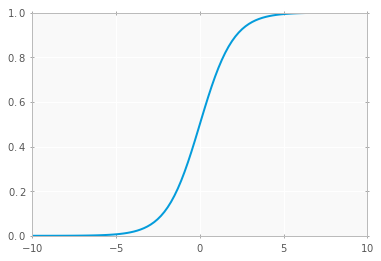

In [7]:
xr = np.linspace(-10,10,100)
plt.plot(xr, sigmoid(xr)[0])

In [40]:
np.random.seed(10)

In [ ]:
class Layer():
    """
    Represents a layer of a neural network.
    """

In [189]:
syn0 = 2*np.random.random((3,1)) - 1
for iter in xrange(10000):
    predictions = sigmoid(np.dot(test.targets, syn0))
    error = test.labels - predictions[0]
    gradients = sigmoid(predictions[0])
    delta = error * gradients[1]
    syn0 += np.dot(test.targets.T, delta)

In [190]:
predictions[0]

array([[ 0.00966948],
       [ 0.0078636 ],
       [ 0.99359104],
       [ 0.99211657]])

3

In [194]:
input_dim = test.targets.shape[-1]
hidden_dim = 2

In [195]:
epsilon = 0.01
r_lambda = 0.01

In [197]:
def softmax(exp_scores):
    """
    Implementation of the SOFTMAX function.
    """
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [196]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model, data):
    y = data.labels
    num_examples = data.targets.shape[0]
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = softmax(exp_scores)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss